In [1]:
#import libraries

import pandas as pd
import seaborn as sns
import graphviz as grph
from sklearn import linear_model
from sklearn import tree
%matplotlib inline

In [2]:
#import data

df = pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


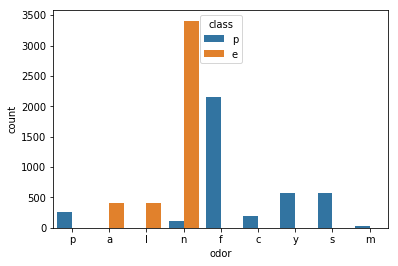

In [16]:
#plot variables against edibility to explore data

sns.countplot(x="odor",hue="class",data=df)

In [4]:
#binarize dataset (columns x variables per column -> yes/no); separate variable for solution (edible)
#tutorial used "classes" instead of "edible"

features = pd.get_dummies(df)
features = features.drop(["class_e", "class_p"], axis=1)
features.head()
edible = df["class"]

In [14]:
#define model

model = tree.DecisionTreeClassifier()
model.fit(features, edible)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

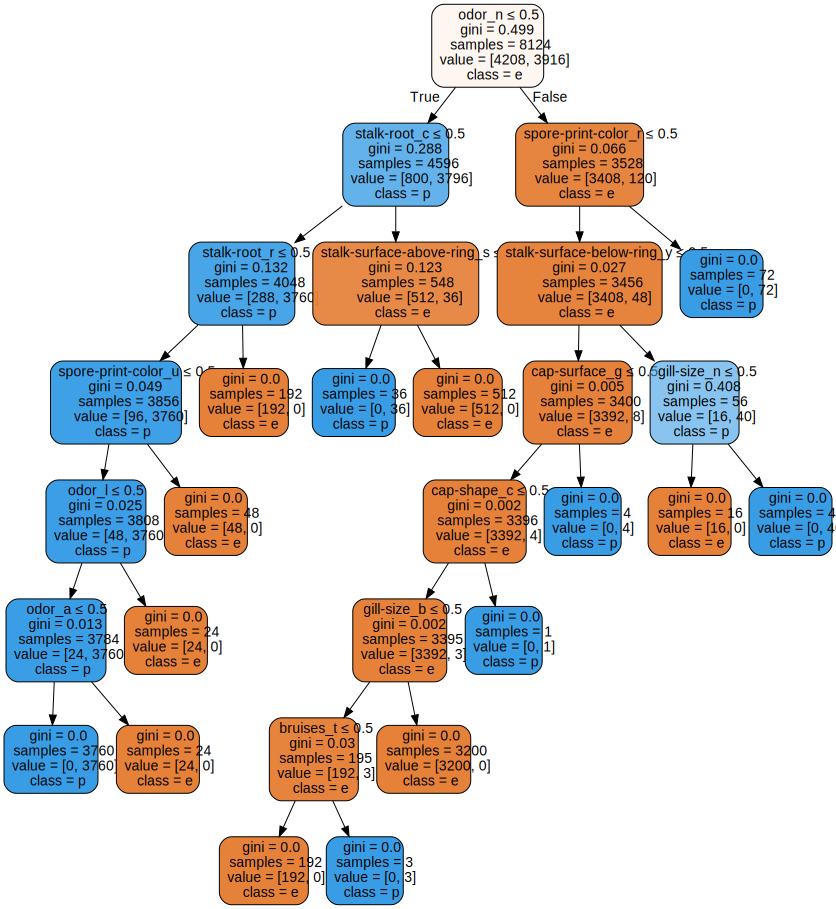

In [15]:
#visualize the tree
#check out documentation at http://scikit-learn.org/stable/modules/tree.html

dot_data = tree.export_graphviz(model, out_file=None, 
                         feature_names=features.columns,  
                         class_names=model.classes_,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = grph.Source(dot_data)  
graph